In [2]:
import pandas as pd

## 1. The preprocessing of secondary mushroom dataset

In [2]:
# Load data
data = pd.read_csv('../datasets/raw_datasets/secondary_mushroom.csv', sep=';')
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [3]:
# Columns list
data.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [4]:
# remove columns with more nans
data = data.drop(['gill-spacing', 'spore-print-color', 'stem-root'], axis=1).dropna()

In [5]:
# One-hot encoding
cols = list(data.columns)
cols.remove('cap-diameter')
cols.remove('stem-height')
cols.remove('stem-width')
cols.remove('class')

data = pd.get_dummies(data, columns=cols)

In [6]:
# move class column to end
cols = list(data.columns)
cols.remove('class')
cols.append('class')

data = data[cols]

In [7]:
# encoding target
data.loc[data['class'] == 'p', 'class'] = 1
data.loc[data['class'] == 'e', 'class'] = 0

In [ ]:
data.to_csv('../datasets/log_reg/mushroom.csv', sep=',')

## 2. The preprocessing students' dropout and academic success dataset

In [5]:
# laod dataset
import pandas as pd
data = pd.read_csv('../datasets/raw_datasets/student.csv', sep=';')
data.head(30)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [6]:
# Columns
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [7]:
# one-hot encoding
cols = list(data.columns)
cols = cols[:cols.index('Admission grade')]
cols.remove('Daytime/evening attendance\t')
cols.remove('Previous qualification (grade)')
data = pd.get_dummies(data, columns=cols, dtype=int)
data.head()

,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Father's occupation_172,Father's occupation_174,Father's occupation_175,Father's occupation_181,Father's occupation_182,Father's occupation_183,Father's occupation_192,Father's occupation_193,Father's occupation_194,Father's occupation_195
0,1,122.0,127.3,1,0,0,1,1,0,20,...,0,0,0,0,0,0,0,0,0,0
1,1,160.0,142.5,1,0,0,0,1,0,19,...,0,0,0,0,0,0,0,0,0,0
2,1,122.0,124.8,1,0,0,0,1,0,19,...,0,0,0,0,0,0,0,0,0,0
3,1,122.0,119.6,1,0,0,1,0,0,20,...,0,0,0,0,0,0,0,0,0,0
4,0,100.0,141.5,0,0,0,1,0,0,45,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# move class column to end
cols = list(data.columns)
cols.remove('Target')
cols.append('Target')

data = data[cols]

In [10]:
# encoding target
data.loc[data['Target'] == 'Graduate', 'Target'] = 0
data.loc[data['Target'] == 'Enrolled', 'Target'] = 1
data.loc[data['Target'] == 'Dropout', 'Target'] = 2

In [28]:
# save data
data.to_csv('../datasets/softmax/students.csv', sep=',', header=False)

## 3. Heart Disease

In [9]:
# laod dataset
data = pd.read_csv('../datasets/raw_datasets/heart_2020_cleaned.csv', sep=',')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [11]:
# Columns
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [12]:
# one-hot encoding
cols = list(data.columns)
cols.remove('HeartDisease')
cols.remove('BMI')
cols.remove('PhysicalHealth')
cols.remove('MentalHealth')
cols.remove('SleepTime')
data = pd.get_dummies(data, columns=cols, dtype=int)
data.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,No,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,No,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,No,26.58,20.0,30.0,8.0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,No,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,No,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0


In [14]:
# move class column to end
cols = list(data.columns)
cols.remove('HeartDisease')
cols.append('HeartDisease')

data = data[cols]
data.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,HeartDisease
0,16.60,3.0,30.0,5.0,0,1,1,0,1,0,...,0,0,1,0,1,1,0,0,1,No
1,20.34,0.0,0.0,7.0,1,0,1,0,0,1,...,0,0,1,1,0,1,0,1,0,No
2,26.58,20.0,30.0,8.0,0,1,1,0,1,0,...,0,0,0,0,1,1,0,1,0,No
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,No
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,0,0,1,1,0,1,0,1,0,No


In [16]:
# encoding target
data.loc[data['HeartDisease'] == 'Yes', 'HeartDisease'] = 1
data.loc[data['HeartDisease'] == 'No', 'HeartDisease'] = 0
data.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,HeartDisease
0,16.60,3.0,30.0,5.0,0,1,1,0,1,0,...,0,0,1,0,1,1,0,0,1,0
1,20.34,0.0,0.0,7.0,1,0,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
2,26.58,20.0,30.0,8.0,0,1,1,0,1,0,...,0,0,0,0,1,1,0,1,0,0
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0


In [17]:
# save data
data.to_csv('../datasets/log_reg/heart_disease.csv', sep=',')

In [22]:
1 - data['HeartDisease'].sum() / len(data['HeartDisease'])

0.9144045404086993

## 4. Adult

In [16]:
# laod dataset
import pandas as pd
data = pd.read_csv('../datasets/raw_datasets/adult.csv', sep=',')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
# Columns
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [18]:
# one-hot encoding
cols = list(data.columns)
cols.remove('age')
cols.remove('fnlwgt')
cols.remove('education-num')
cols.remove('sex')
cols.remove('capital-gain')
cols.remove('capital-loss')
cols.remove('hours-per-week')
cols.remove('target')
data = pd.get_dummies(data, columns=cols, dtype=int)
data.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,target,workclass_?,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,Male,2174,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,Male,0,0,13,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,Female,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# move class column to end
cols = list(data.columns)
cols.remove('target')
cols.append('target')

data = data[cols]
data.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,target
0,39,77516,13,Male,2174,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,83311,13,Male,0,0,13,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,215646,9,Male,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,234721,7,Male,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,338409,13,Female,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,<=50K


In [24]:
# encoding target
data.loc[data['target'] == '>50K', 'target'] = 1
data.loc[data['target'] == '>50K.', 'target'] = 1
data.loc[data['target'] == '<=50K', 'target'] = 0
data.loc[data['target'] == '<=50K.', 'target'] = 0

# encoding Sex
data.loc[data['sex'] == 'Male', 'sex'] = 1
data.loc[data['sex'] == 'Female', 'sex'] = 0

data.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,target
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Preliminary analysis of blog pages dataset

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('/home/Musolmon/Documents/programs/assessor-feedback/datasets/BlogFeedback/blogData_train.csv', delimiter=',')

(array([464., 227., 164., 102.,  83.,  55.,  57.,  46.,  45.,  31.,  26.,
         21.,  19.,  25.,   9.,  13.,   5.,   8.,  14.,   9.,   1.,   4.,
          3.,   0.,   4.,   4.,   1.,   1.,   4.,   2.,   0.,   0.,   1.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([  51.  ,   78.46,  105.92,  133.38,  160.84,  188.3 ,  215.76,
         243.22,  270.68,  298.14,  325.6 ,  353.06,  380.52,  407.98,
         435.44,  462.9 ,  490.36,  517.82,  545.28,  572.74,  600.2 ,
         627.66,  655.12,  682.58,  710.04,  737.5 ,  764.96,  792.42,
         819.88,  847.34,  874.8 ,  902.26,  929.72,  957.18,  984.64,
        1012.1 , 1039.56, 1067.02, 1094.48, 1121.94, 1149.4 , 1176.86,
        1204.32, 1231.78, 1259.24, 1286.7 , 1314.16, 1341.62, 1369.08,
        1396.54, 1424.  ]),
 <BarContainer object of 50 artists>)

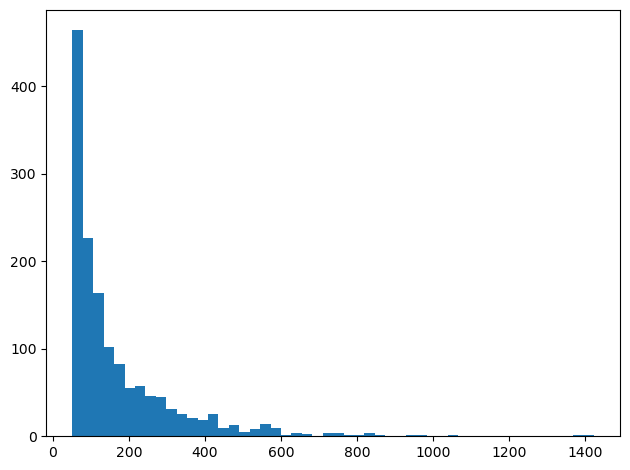

In [11]:
fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)
ax.hist(data[data[:, -1] > 50, -1], bins=50)

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [7]:
with open('/home/Musolmon/Documents/programs/assessor-feedback/file-results/reg/worst_reg_exp1.pkl', 'rb') as f:
  tendency = pickle.load(f)

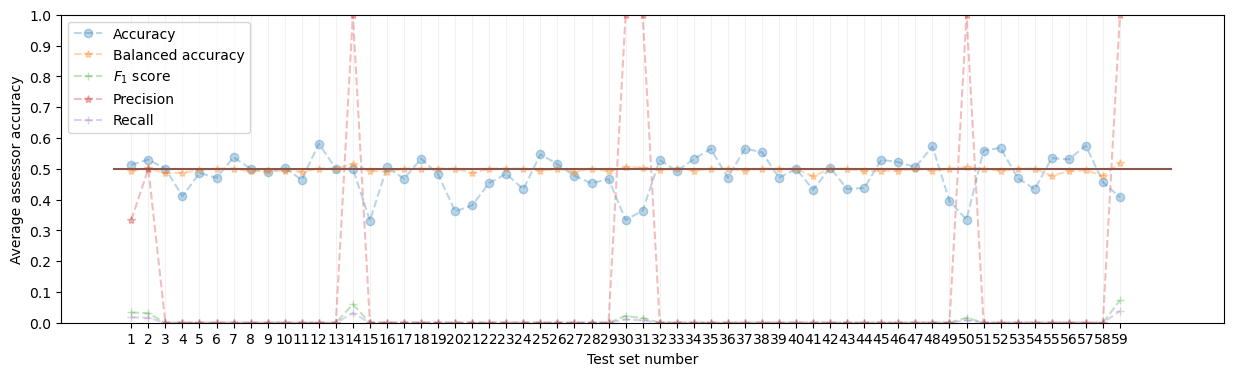

In [8]:
plt.rcParams["figure.figsize"] = (15,4)
indices = np.arange(len(tendency)) + 1

# plt.step(indices, tendency[:, 0], label='Accuracy')
plt.plot(indices, tendency[:, 0], 'o--', alpha=0.3, label='Accuracy')

# plt.step(indices, tendency[:, 1], where='mid', label='Balanced accuracy')
plt.plot(indices, tendency[:, 1], '*--', alpha=0.3, label='Balanced accuracy')

# plt.step(indices, tendency[:, 2], where='mid', label='$F_1$ score')
plt.plot(indices, tendency[:, 2], '+--', alpha=0.3, label='$F_1$ score')

# plt.step(indices, tendency[:, 3], where='mid', label='Precision')
plt.plot(indices, tendency[:, 3], '*--', alpha=0.3, label='Precision')

# plt.step(indices, tendency[:, 4], where='mid', label='Recall')
plt.plot(indices, tendency[:, 4], '+--', alpha=0.3, label='Recall')

plt.xticks(indices)
plt.yticks(np.linspace(0, 1, 11))
plt.ylim(0, 1)
plt.plot([0, 62], [0.5, 0.5])

plt.xlabel('Test set number')
plt.ylabel('Average assessor accuracy')
plt.grid(axis='x', color='0.95')
plt.legend()

# plt.title('Accuracies of the best systems on 60 splits of the test set')
# plt.savefig('./image-results/reg/' + save_file_name + '.svg')
# plt.savefig('./image-results/reg/' + save_file_name + '.eps')

plt.show()

## MNIST dataset to convert vector-like form

In [4]:
import tensorflow as tf
import numpy as np

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [18]:
x = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)
x.shape

(70000, 28, 28)

In [19]:
x = x.reshape((x.shape[0], -1))
x.shape

(70000, 784)

In [20]:
data = np.concatenate([x, y.reshape(y.shape[0], -1)], axis=1)
data.shape

(70000, 785)

In [21]:
np.savetxt('../datasets/softmax/mnist_fashoin.csv', data, delimiter=',')

# Parkinsons telemonitoring

In [22]:
import numpy as np

In [23]:
data = np.loadtxt('../datasets/raw_datasets/parkinsons_updrs.data', delimiter=',')
data.shape

(5875, 22)

In [26]:
cols = np.zeros(data.shape[1]) + 1
# dropping columns
cols[0] = 0
cols[1] = 0
cols[2] = 0
cols[20] = 0
cols[21] = 0

x = data[:, cols == 1]
x.shape

(5875, 17)

In [27]:
np.savetxt('../datasets/reg-one/telemonotoring.csv', x)